# Algoritmo de Grover

### Importamos las herramientas necesarias:

In [1]:
import qiskit

In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import plot_histogram

In [4]:
import math

In [5]:
from math import pi

In [6]:
import matplotlib

In [7]:
%matplotlib inline

### Banco de datos

Partimos de tener un banco de datos con N elementos en el que cada uno de estos está indexado con un número entero [0, N-1]. por simplicidad supondremos que N es una potencia de 2. En este ejemplo en particular se usará n=3. Es decir, los objetos en el banco de datos estarán indexados con las 3-tuplas de bits: 000, 001, 010, 011, 100, 101, 110 y 111.

Al igual que con el algoritmo de Deutsch-Josza, si se desea implementar el algoritmo de Grover para valores de n "grandes" (en este caso n>3), se necesitan compuertas controladas con más de 2 qubits de control.

### Definición de la compuerta Uw para w = 011

Supondremos que el elemento que queremos encontrar en el banco de datos está indexado por la 3-tupla de bits w=011. El algoritmo nos dice entonces que necesitamos contruir la compuerta Uw = I - 2|w><w| , la cual actúa como el operador identidad para todo elemento excepto el w, y a éste le cambia el signo. Realizar esta operación requiere de una compuerta CC-Z, la cual no está en la librería qiskit. Para su implementación utilizaremos el resultado del ejercicio 2 de su tarea 3.

In [30]:
Uw = QuantumCircuit(3)

In [31]:
Uw.x(2)
Uw.cu1(pi/2,1,0)
Uw.cx(2,1)
Uw.cu1(-pi/2,1,0)
Uw.cx(2,1)
Uw.cu1(pi/2,2,0)
Uw.x(2)

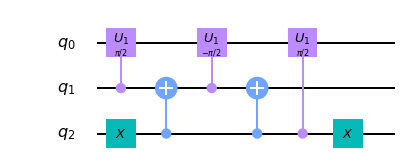

In [32]:
Uw.draw(output = 'mpl')

In [8]:
def uw(circuit):
    circuit.x(2)
    circuit.cu1(pi/2,1,0)
    circuit.cx(2,1)
    circuit.cu1(-pi/2,1,0)
    circuit.cx(2,1)
    circuit.cu1(pi/2,2,0)
    circuit.x(2)

### Definición de la compuerta Us

El algoritmo también requiere de la compuesrta Us = 2|s><s| - I, la cual puede ser escrita (para n=1) como Us = H (2|0><0| - I) H. Es decir, podemos implementar Us con un operador que cambia el signo de todos los estados excepto el |000> entre compuertas Hadamard en cada qubit.

In [38]:
n=3
Us = QuantumCircuit(3)

In [39]:
for i in range(0,n):
    Us.h(i)

In [40]:
for i in range(0,n):
    Us.x(i)

In [41]:
Us.cu1(pi/2,1,0)
Us.cx(2,1)
Us.cu1(-pi/2,1,0)
Us.cx(2,1)
Us.cu1(pi/2,2,0)

In [42]:
for i in range(0,n):
    Us.x(i)

In [44]:
for i in range(0,n):
    Us.h(i)

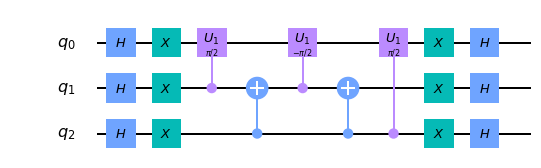

In [45]:
Us.draw(output = 'mpl')

In [9]:
def us(circuit):
    
    for i in range(0,n):
        circuit.h(i)
    
    for i in range(0,n):
        circuit.x(i)
    
    circuit.cu1(pi/2,1,0)
    circuit.cx(2,1)
    circuit.cu1(-pi/2,1,0)
    circuit.cx(2,1)
    circuit.cu1(pi/2,2,0)
    
    for i in range(0,n):
        circuit.x(i)
    
    for i in range(0,n):
        circuit.h(i)    

### Construcción del circuito para el algoritmo de Grover
En el caso del algorimto de Grover (con n=3) requerimos 3 qubits y 3 bits clásicos para guardar los resultados de las mediciones.

In [28]:
n = 3

In [29]:
qc = QuantumCircuit(n,n)

In [30]:
for i in range(0,n):
    qc.h(i)

qc.barrier(range(0,n))

In [31]:
# 1ª iteración

uw(qc)
us(qc)
qc.barrier(range(0,n))

In [32]:
# 2ª iteración

uw(qc)
us(qc)
qc.barrier(range(0,n))

In [80]:
# 3ª iteración (ya nos pasamos)

uw(qc)
us(qc)
qc.barrier(range(0,n))

In [33]:
qc.measure(range(0,n),range(0,n))

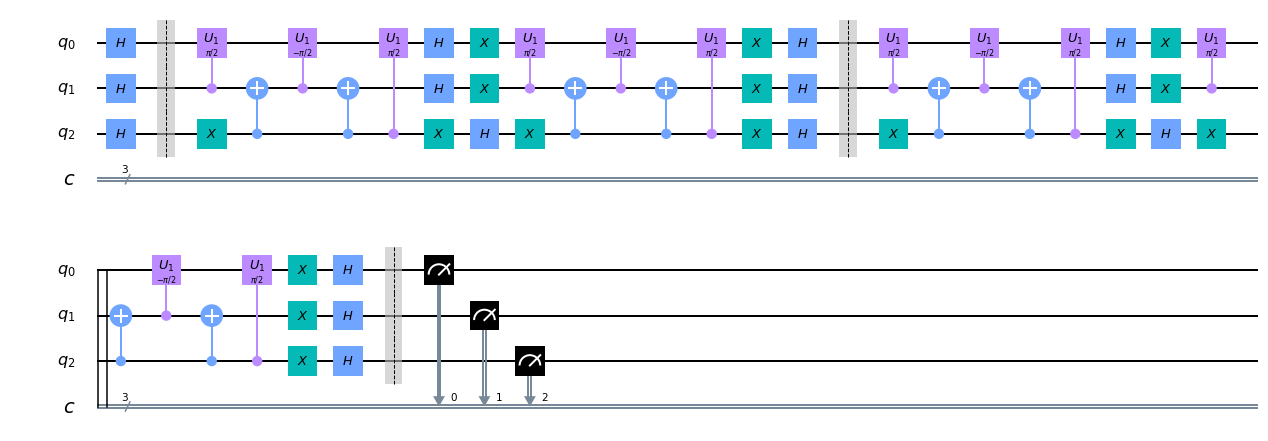

In [34]:
qc.draw(output = 'mpl')

### Simulación y visualización de los resultados

Utilizaremos el simulador "qasm" para simular el circuito construido y visualizaremos los resultados de las mediciones en un histograma.

In [17]:
qasm = Aer.get_backend('qasm_simulator')

In [18]:
job = execute(qc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc)

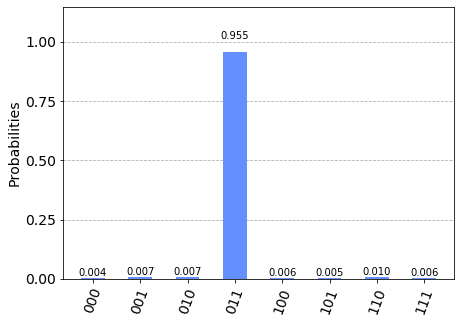

In [19]:
plot_histogram(counts)

### Implementación del algoritmo en las computadoras cuánticas de IBM

In [20]:
IBMQ.load_account()

C:\Users\lfqm1\.conda\envs\Qiskit\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [35]:
provider = IBMQ.get_provider('ibm-q')

In [36]:
qcomp = provider.get_backend('ibmq_vigo')

In [37]:
job = execute(qc, backend = qcomp, shots = 1024)

In [38]:
from qiskit.tools.monitor import job_monitor

In [39]:
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()
counts2 = result.get_counts(qc)

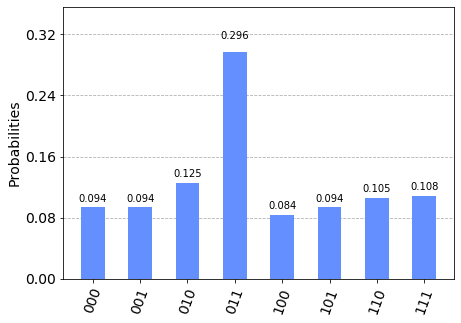

In [27]:
plot_histogram(counts2)